# 🫀Heart Disease Detection Using Machine Learning
##### Goals
- We want to study the dataset and get better understanding of the data we would be working with.
- Analyse the data present in our dataset.
- Visualise data:
    - Visualise values in our dataset to better understand and explain to non technical users better.
    - Visualise Relationships In Our Data.
    - Visualise Outliers.
    - Visualise Skewdness.
    - Visualise Correlation.
- We want to clean our dataset of any abnormalities:
    - Drop unneeded columns.
    - Cap & Floor Outlier Values.
    - Replace missing values with Mean/Median/Mode of the series.
    - Remove any columns with multicollinarity.
- We want to build a model to predict if a patient may have heart disease. 
##### Tools Being Used
- Pandas
- Numpy
- Seaborn
- Matplotlib
- sklearn
##### Dataset(s) being used
- heart.csv (Dataset Gotten From Kaggle.com)

In [1]:
# Importing Necessary Modules
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Encoders
from sklearn.preprocessing import OrdinalEncoder

# Box-Cox For Data Skew Correction
from scipy.stats import boxcox

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# KNN 
from sklearn.neighbors import KNeighborsClassifier as knn

# SVM
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3778085799.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Going Through Individual Columns Of The Dataset
with open("heart.csv", 'r') as file:
    data_description = file.read()
    print(data_description)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
43,0,0,132,341,1,0,136,1,3,1,0,3,0
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
52,1,0,128,204,1,1,156,1,1,1,0,0,0
34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
54,1,0,124,266,0,0,109,1,2.2,1,1,3,0
50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
58,1,2,140,211,1,0,165,0,0,2,0,2,1
60,1,2,140,185,0,0,155,0,3,1,0,2,0
67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
45,1,0,104,208,0,0,148,1,3,1,0,2,1
63,0,2,135,252,0,0,172,0,0,2,0,2,1
42,0,2,120,209,0,1,173,0,0,1,0,2,1
61,0,0,145,307,

# Analysing Features Of Our Dataset:
1. Age
2. Sex (1=male, 0=female)
3. ChestPain 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
4. RestingBloodPressure
5. Cholesterol in mg/dl
6. FastingBloodSugar > 120 mg/dl (1=true, 0=false)
7. RestingECG results 0: Normal, 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaximumHeartRateAchieved
9. ExerciseInducedAngina 1: Yes, 0: No
10. OldPeak = ST depression induced by exercise relative to rest
11. Slope Of The Peak Exercise ST Segment
12. Number Of Major Vessels (0-3) Colored By Flourosopy
13. Thalium: 0: Normal; 1: Fixed Defect, 2: Reversable Defect
14. Status: 0: "No Disease", 1: "Heart Disease"

In [3]:
# Load the dataset using Pandas read_csv method
df = pd.read_csv("heart.csv")  # Reads the CSV file and creates a DataFrame

In [4]:
df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trestbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalach":"MaxHeartRate",
    "exang":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slope":"STSlope",
    "ca":"nMajorVessels",
    "thal":"Thalium",
    "target":"Status"
}, inplace=True)

In [5]:
Sex_mappings = {
    0: "Female",
    1: "Male"
}
ChestPain_mappings = {
    0: "Typical angina",
    1: "Atypical angina",
    2: "Non-anginal pain",
    3: "Asymptomatic"
}
FastingBloodSugar_mappings = {
    0: False,
    1: True
}
RestingECG_mappings = {
    0: "Normal",
    1: "Abnormality",
    2: "Hypertrophy"
}
ExerciseAngina_mappings = {
    0: "No",
    1: "Yes"
}
STSlope_mappings = {
    0: "Upsloping",
    1: "Flat",
    2: "Downsloping"
}
Thalium_mappings = {
    0: "Normal",
    1: "Fixed defect",
    2: "Reversible defect",
    3: "Not described"
}
Status_mappings = {
   0: "No Disease",
   1: "Heart Disease"
}

# Replace values in DataFrame
df["Sex"] = df["Sex"].replace(Sex_mappings).astype(object)
df["ChestPain"] = df["ChestPain"].replace(ChestPain_mappings).astype(object)
df["FastingBloodSugar"] = df["FastingBloodSugar"].replace(FastingBloodSugar_mappings).astype(object)
df["RestingECG"] = df["RestingECG"].replace(RestingECG_mappings).astype(object)
df["ExcerciseAngina"] = df["ExcerciseAngina"].replace(ExerciseAngina_mappings).astype(object)
df["STSlope"] = df["STSlope"].replace(STSlope_mappings).astype(object)
df["Thalium"] = df["Thalium"].replace(Thalium_mappings).astype(object)
df["Status"] = df["Status"].replace(Status_mappings).astype(object)

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\621798585.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["FastingBloodSugar"] = df["FastingBloodSugar"].replace(FastingBloodSugar_mappings).astype(object)


# Analysing Our Data 
We used the following methods to explore and understand our and look for any irregularities:
- head()
- tail()
- info()
- describe()
- shape
- isnull()

In [6]:
# Display the first few rows of the dataset to get an overview
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,52,Male,Typical angina,125,212,False,Abnormality,168,No,1.0,Downsloping,2,Not described,No Disease
1,53,Male,Typical angina,140,203,True,Normal,155,Yes,3.1,Upsloping,0,Not described,No Disease
2,70,Male,Typical angina,145,174,False,Abnormality,125,Yes,2.6,Upsloping,0,Not described,No Disease
3,61,Male,Typical angina,148,203,False,Abnormality,161,No,0.0,Downsloping,1,Not described,No Disease
4,62,Female,Typical angina,138,294,True,Abnormality,106,No,1.9,Flat,3,Reversible defect,No Disease


In [7]:
# Display the last few rows of the dataset to get an overview
df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
1020,59,Male,Atypical angina,140,221,False,Abnormality,164,Yes,0.0,Downsloping,0,Reversible defect,Heart Disease
1021,60,Male,Typical angina,125,258,False,Normal,141,Yes,2.8,Flat,1,Not described,No Disease
1022,47,Male,Typical angina,110,275,False,Normal,118,Yes,1.0,Flat,1,Reversible defect,No Disease
1023,50,Female,Typical angina,110,254,False,Normal,159,No,0.0,Downsloping,0,Reversible defect,Heart Disease
1024,54,Male,Typical angina,120,188,False,Abnormality,113,No,1.4,Flat,1,Not described,No Disease


In [8]:
# Get information about the dataset (e.g., number of rows, columns, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1025 non-null   int64  
 1   Sex                   1025 non-null   object 
 2   ChestPain             1025 non-null   object 
 3   RestingBloodPressure  1025 non-null   int64  
 4   Cholesterol           1025 non-null   int64  
 5   FastingBloodSugar     1025 non-null   object 
 6   RestingECG            1025 non-null   object 
 7   MaxHeartRate          1025 non-null   int64  
 8   ExcerciseAngina       1025 non-null   object 
 9   OldPeak               1025 non-null   float64
 10  STSlope               1025 non-null   object 
 11  nMajorVessels         1025 non-null   int64  
 12  Thalium               1025 non-null   object 
 13  Status                1025 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [9]:
# Display a statistical breakdown of our data factoring values like (mean, median, std, 25-50-75 percentiles)
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


In [10]:
# Get the number of rows and column
df.shape

(1025, 14)

In [11]:
df.isnull().sum()

Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

# Visualising Our Data

#### Visulaing Categorical Values

<Axes: xlabel='Sex', ylabel='count'>

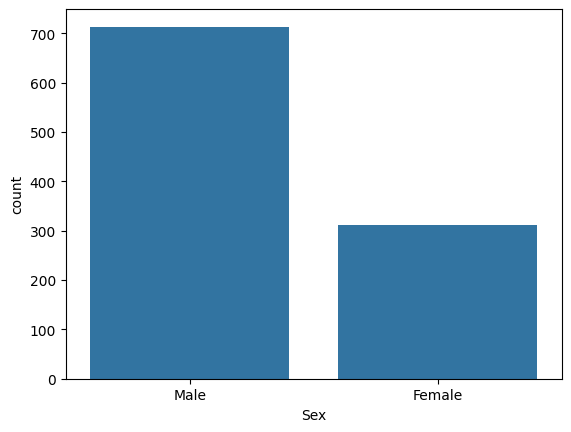

In [12]:
sns.countplot(x="Sex", data=df)

<Axes: xlabel='ChestPain', ylabel='count'>

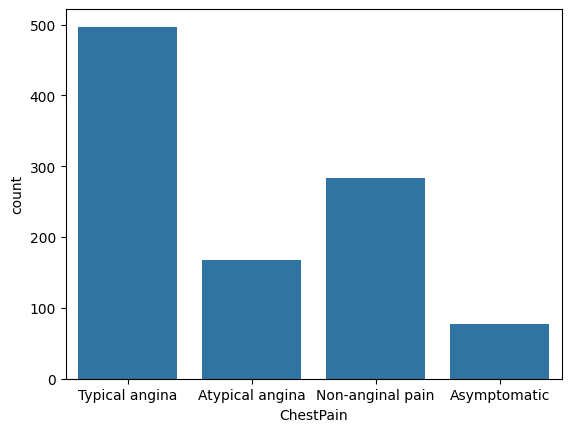

In [13]:
sns.countplot(x="ChestPain", data=df)

<Axes: xlabel='RestingECG', ylabel='count'>

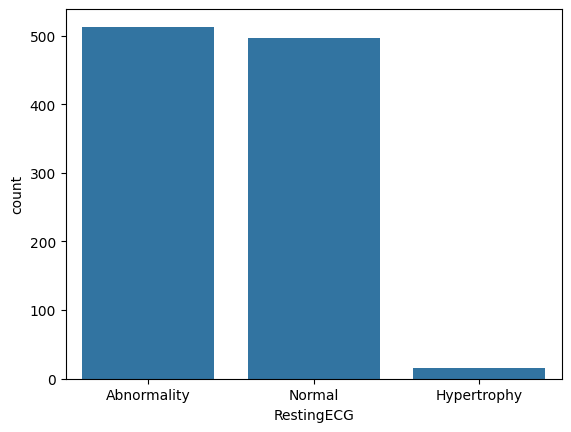

In [14]:
sns.countplot(x="RestingECG", data=df)

<Axes: xlabel='ExcerciseAngina', ylabel='count'>

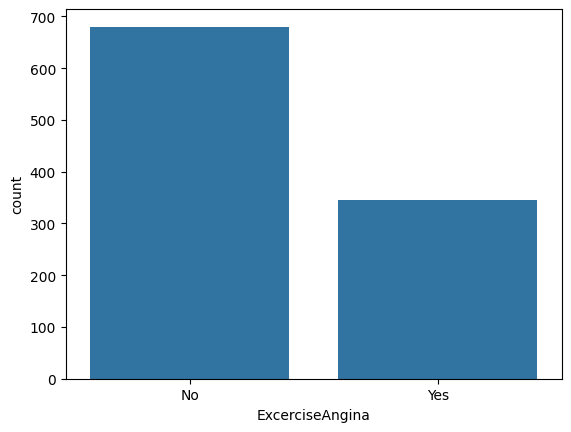

In [15]:
sns.countplot(x="ExcerciseAngina", data=df)

<Axes: xlabel='STSlope', ylabel='count'>

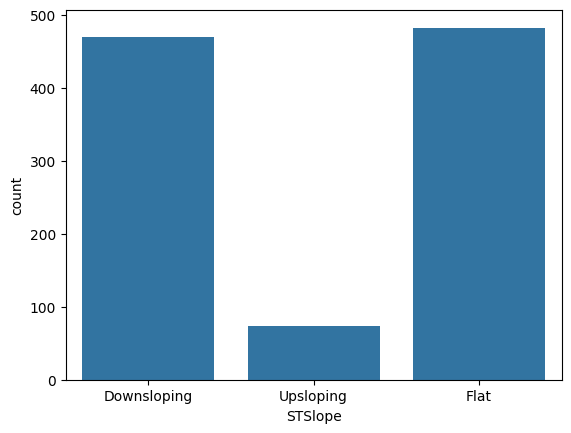

In [16]:
sns.countplot(x="STSlope", data=df)

<Axes: xlabel='Thalium', ylabel='count'>

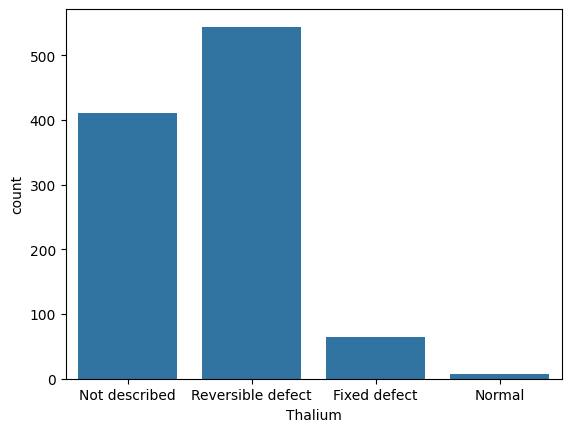

In [17]:
sns.countplot(x="Thalium", data=df)

<Axes: xlabel='Status', ylabel='count'>

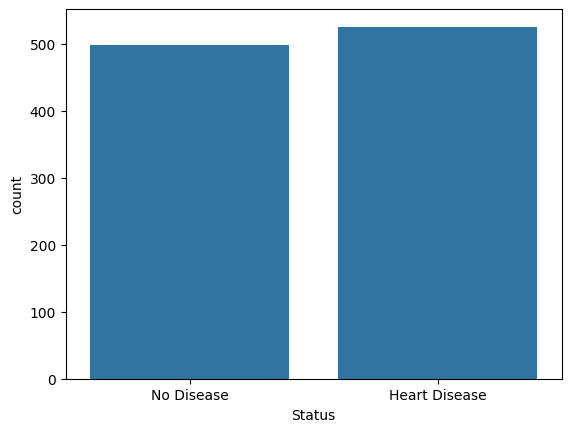

In [18]:
sns.countplot(x="Status", data=df)

### Visualising Numerical Data

##### Using Age

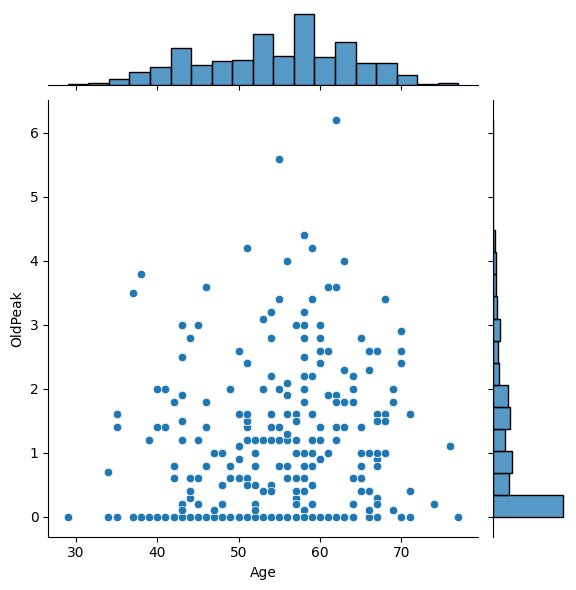

In [19]:
sns.jointplot(x="Age", y="OldPeak", data=df)    

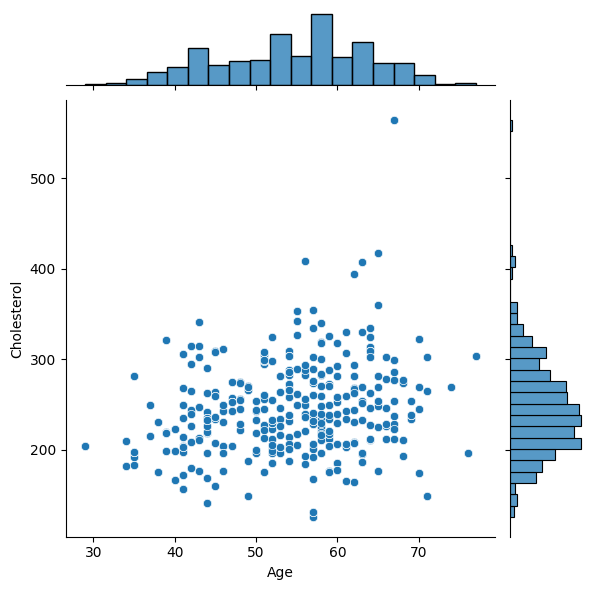

In [20]:
sns.jointplot(x="Age", y="Cholesterol", data=df)   

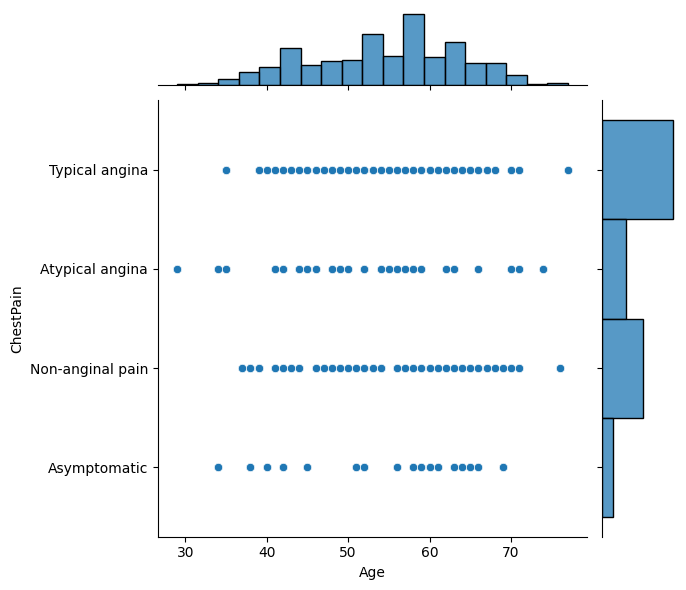

In [21]:
sns.jointplot(x="Age", y="ChestPain", data=df) 

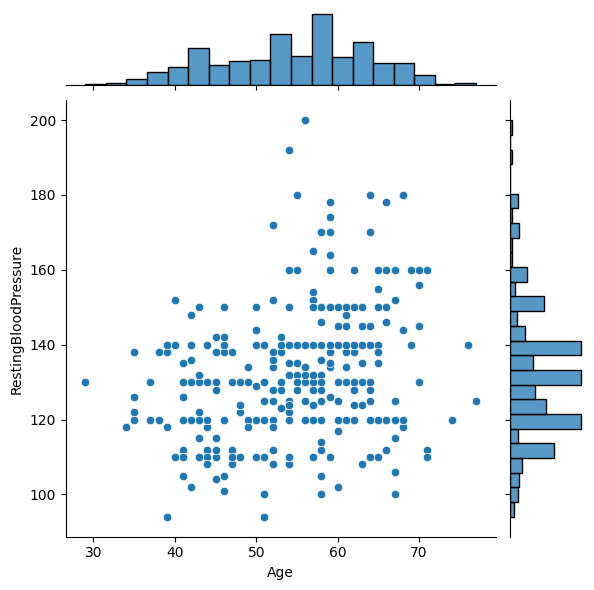

In [22]:
sns.jointplot(x="Age", y="RestingBloodPressure", data=df) 

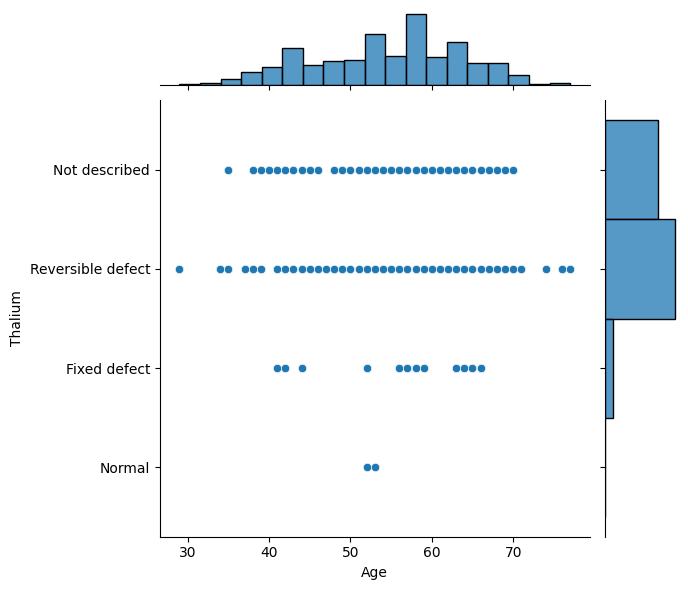

In [23]:
sns.jointplot(x="Age", y="Thalium", data=df)

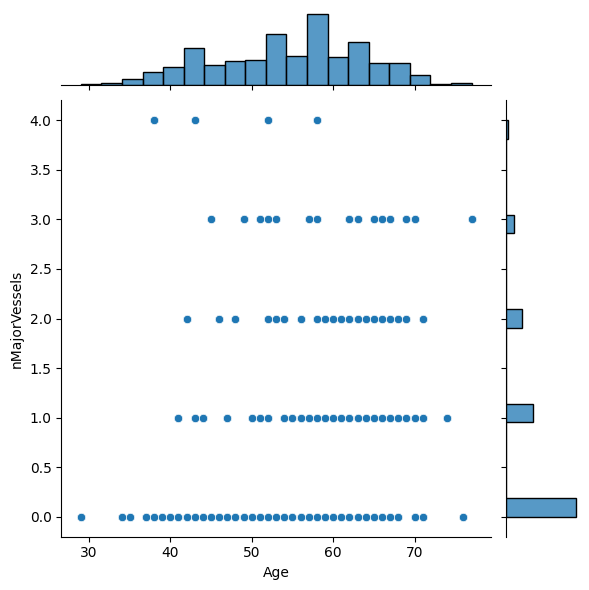

In [24]:
sns.jointplot(x="Age", y="nMajorVessels", data=df) 

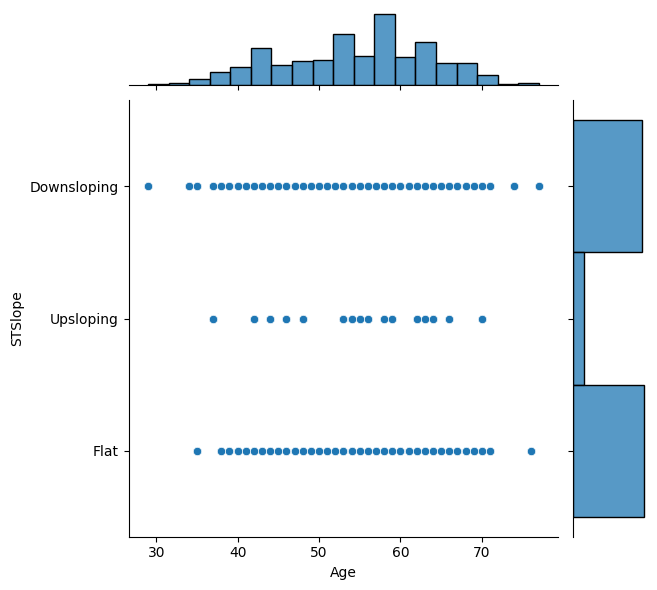

In [25]:
sns.jointplot(x="Age", y="STSlope", data=df)

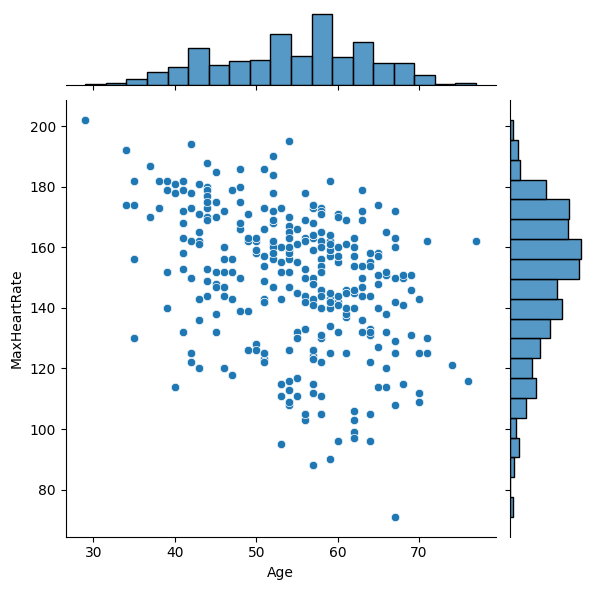

In [26]:
sns.jointplot(x="Age", y="MaxHeartRate", data=df)

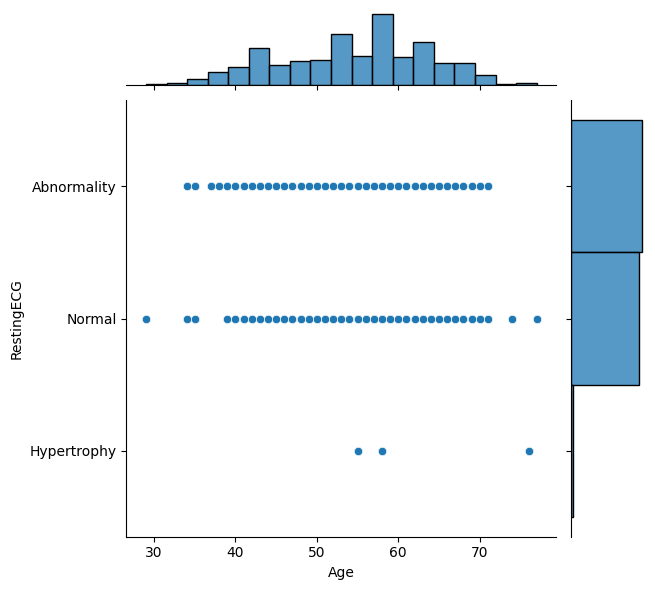

In [27]:
sns.jointplot(x="Age", y="RestingECG", data=df)

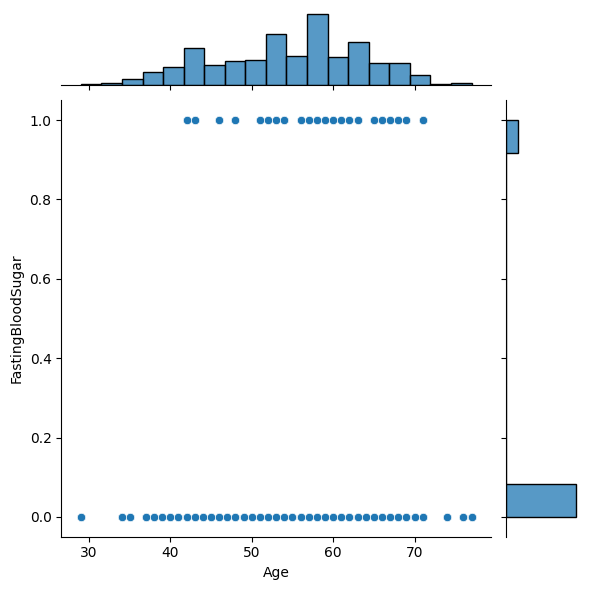

In [28]:
sns.jointplot(x="Age", y="FastingBloodSugar", data=df)

##### Using Sex

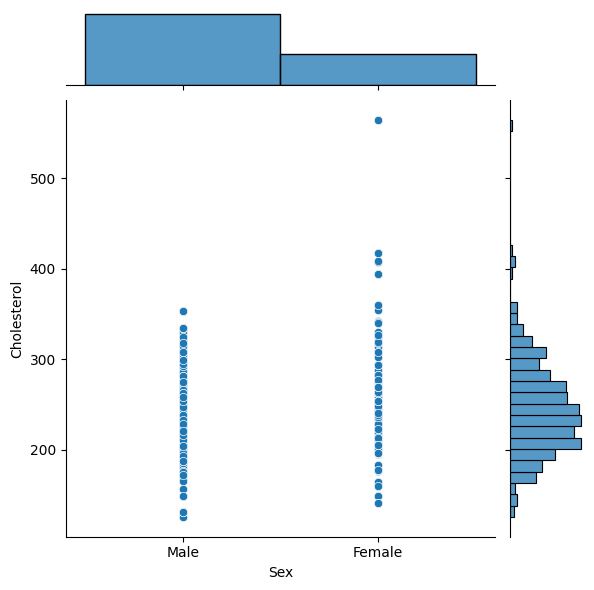

In [29]:
sns.jointplot(x="Sex", y="Cholesterol", data=df)   

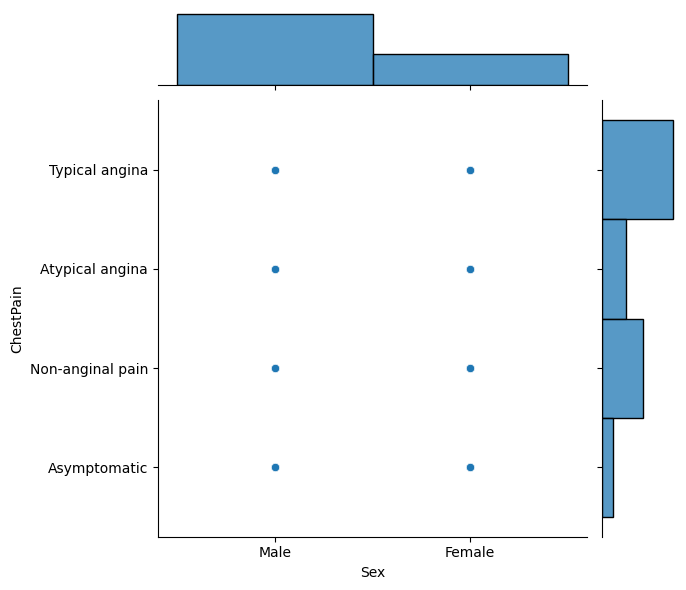

In [30]:
sns.jointplot(x="Sex", y="ChestPain", data=df)   

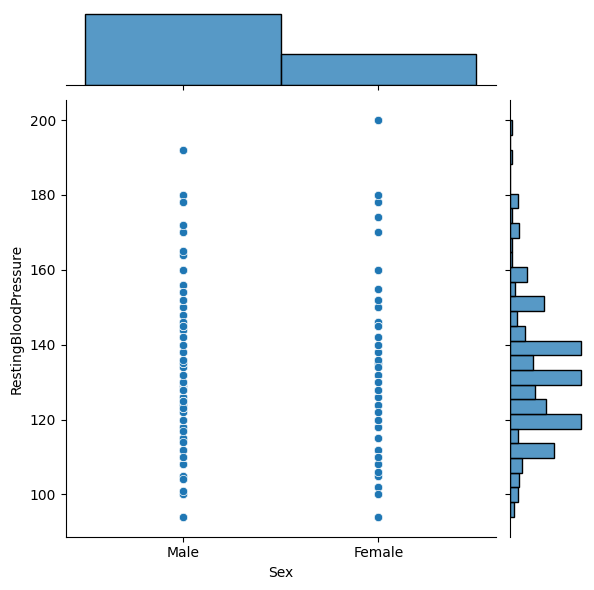

In [31]:
sns.jointplot(x="Sex", y="RestingBloodPressure", data=df)   

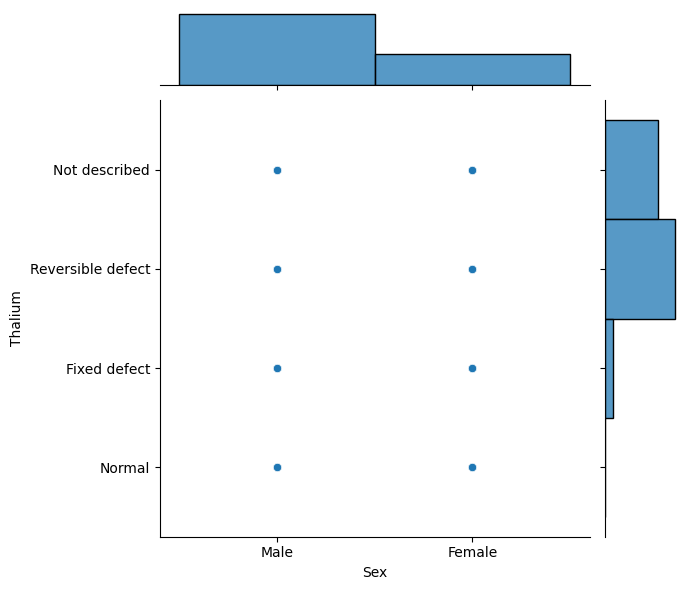

In [32]:
sns.jointplot(x="Sex", y="Thalium", data=df)   

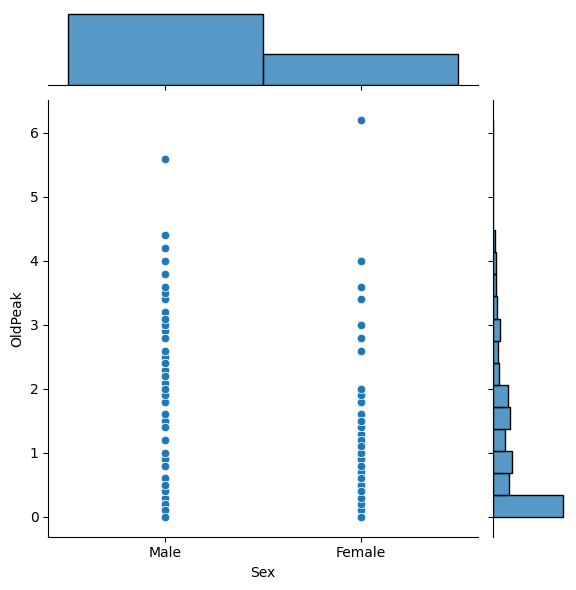

In [33]:
sns.jointplot(x="Sex", y="OldPeak", data=df)   

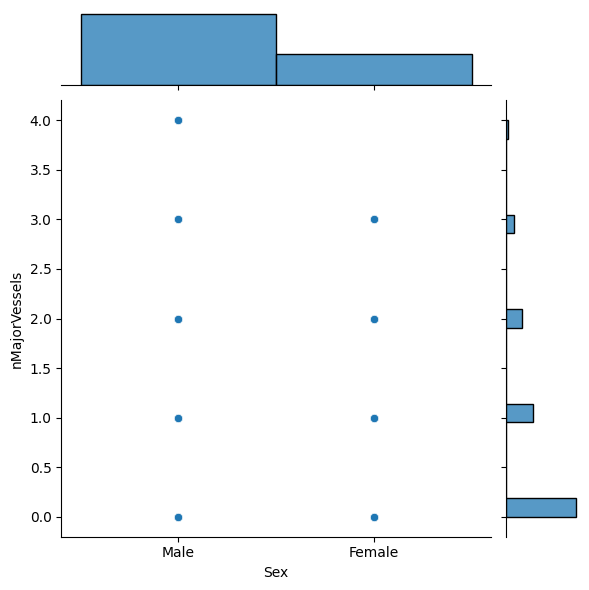

In [34]:
sns.jointplot(x="Sex", y="nMajorVessels", data=df)   

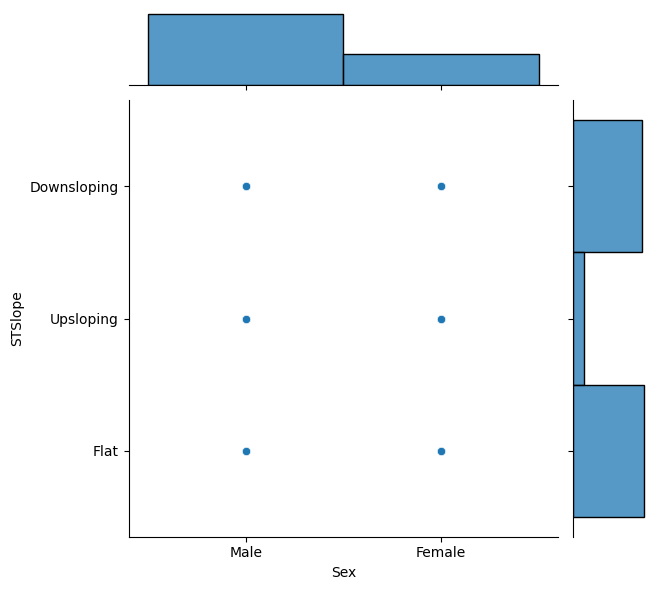

In [35]:
sns.jointplot(x="Sex", y="STSlope", data=df)

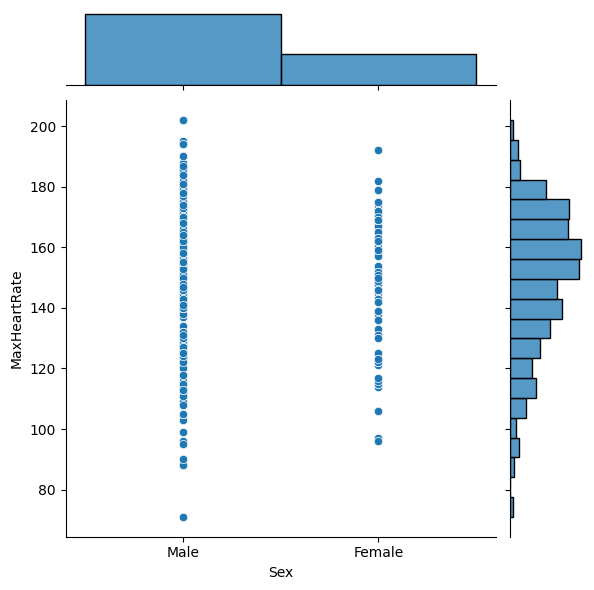

In [36]:
sns.jointplot(x="Sex", y="MaxHeartRate", data=df)

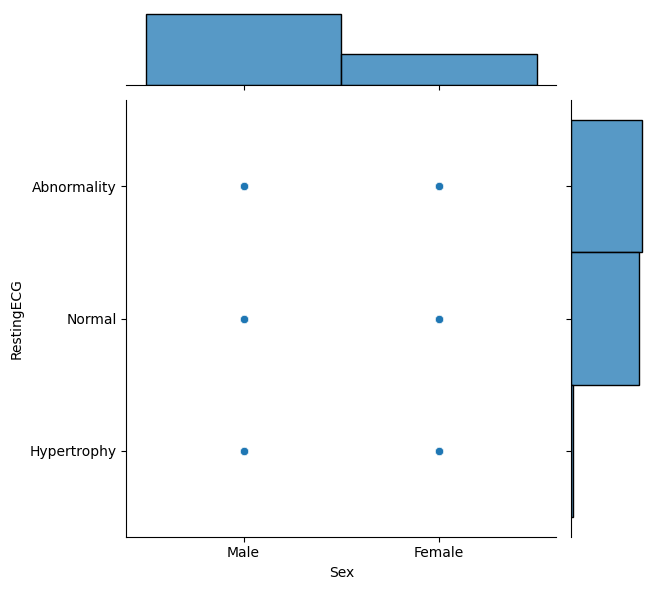

In [37]:
sns.jointplot(x="Sex", y="RestingECG", data=df)

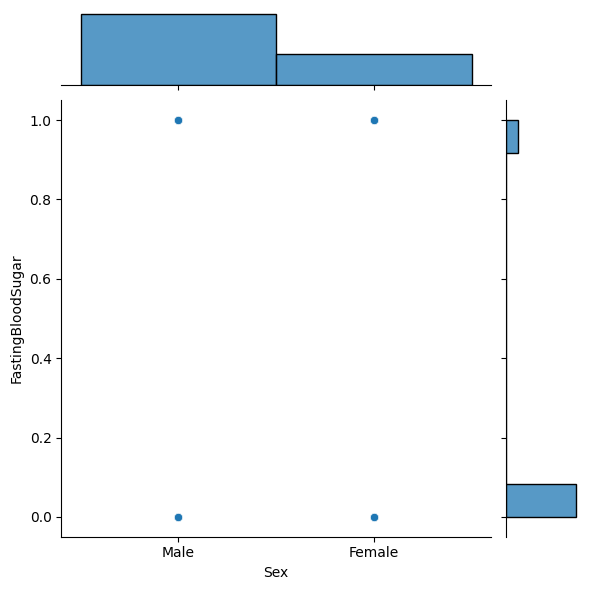

In [38]:
sns.jointplot(x="Sex", y="FastingBloodSugar", data=df)

# Assertations From Data
- Our Data Has More Males Than Females. 700 Males To 300 Females
- Our Data Shows Males Have Larger Oldpeak Than Feamles.
- Our Data Shows Females Have Larger Level Of Cholestoral Than Males.
- Our Data Shows Larger Maximum Heart Rate In Males Than Females. 
## Observations
#### Outliers Found
- OldPeak (Upper Bound)
- Cholesterol (Upper Bound)
- RestingBloodPressure (Upper Bound)
- Age (Upper Bound)
#### Series With Missing Values
Our data contains no series with missing values. All columns have 1025 values.
## Data In Dataset
### Numerical Features
- Age	
- RestingBloodPressure	
- Cholesterol	
- MaxHeartRate	
- OldPeak	
- nMajorVessels	

### Categorical Features
- Sex	
- ChestPain	
- FastingBloodSugar
- RestingECG
- ExcerciseAngina
- STSlope	
- Thalium	
- Status 

## Handling Outlier Values
We correct our outlier values by Capping & Flooring Method

In [39]:
# OlPeak (Upper Bound)
np.percentile(df.OldPeak,[99])

array([4.352])

In [40]:
uv = np.percentile(df.OldPeak,[99])[0]

In [41]:
df[(df.OldPeak>uv)]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
6,58,Male,Typical angina,114,318,False,Hypertrophy,140,No,4.4,Upsloping,3,Fixed defect,No Disease
54,55,Male,Typical angina,140,217,False,Abnormality,111,Yes,5.6,Upsloping,0,Not described,No Disease
55,55,Male,Typical angina,140,217,False,Abnormality,111,Yes,5.6,Upsloping,0,Not described,No Disease
69,62,Female,Typical angina,160,164,False,Normal,145,No,6.2,Upsloping,3,Not described,No Disease
150,58,Male,Typical angina,114,318,False,Hypertrophy,140,No,4.4,Upsloping,3,Fixed defect,No Disease
393,62,Female,Typical angina,160,164,False,Normal,145,No,6.2,Upsloping,3,Not described,No Disease
526,62,Female,Typical angina,160,164,False,Normal,145,No,6.2,Upsloping,3,Not described,No Disease
613,55,Male,Typical angina,140,217,False,Abnormality,111,Yes,5.6,Upsloping,0,Not described,No Disease
661,58,Male,Typical angina,114,318,False,Hypertrophy,140,No,4.4,Upsloping,3,Fixed defect,No Disease
833,55,Male,Typical angina,140,217,False,Abnormality,111,Yes,5.6,Upsloping,0,Not described,No Disease


In [42]:
df.OldPeak[(df.OldPeak> uv)] = 4.5

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\2027947190.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.OldPeak[(df.OldPeak> uv)] = 4.5
C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\2027947190.py:1: Se

In [43]:
# Cholesterol (Upper Bound)
np.percentile(df.Cholesterol,[99])

array([407.])

In [44]:
uv = np.percentile(df.Cholesterol,[99])[0]

In [45]:
df[(df.Cholesterol > uv)]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
123,65,Female,Non-anginal pain,140,417,True,Normal,157,No,0.8,Downsloping,1,Reversible defect,Heart Disease
158,67,Female,Non-anginal pain,115,564,False,Normal,160,No,1.6,Flat,0,Not described,Heart Disease
179,56,Female,Typical angina,134,409,False,Normal,150,Yes,1.9,Flat,2,Not described,No Disease
192,67,Female,Non-anginal pain,115,564,False,Normal,160,No,1.6,Flat,0,Not described,Heart Disease
464,67,Female,Non-anginal pain,115,564,False,Normal,160,No,1.6,Flat,0,Not described,Heart Disease
641,56,Female,Typical angina,134,409,False,Normal,150,Yes,1.9,Flat,2,Not described,No Disease
665,65,Female,Non-anginal pain,140,417,True,Normal,157,No,0.8,Downsloping,1,Reversible defect,Heart Disease
958,65,Female,Non-anginal pain,140,417,True,Normal,157,No,0.8,Downsloping,1,Reversible defect,Heart Disease
996,56,Female,Typical angina,134,409,False,Normal,150,Yes,1.9,Flat,2,Not described,No Disease


In [46]:
df.Cholesterol[(df.Cholesterol > uv)] = uv

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\4036416015.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Cholesterol[(df.Cholesterol > uv)] = uv
C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\4036416015.

In [47]:
# RestingBloodPressure (Upper Bound)
np.percentile(df.RestingBloodPressure,[99])

array([180.])

In [48]:
uv = np.percentile(df.RestingBloodPressure,[99])[0]

In [49]:
df[(df.RestingBloodPressure>uv)]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
151,54,Male,Atypical angina,192,283,False,Normal,195,No,0.0,Downsloping,1,Not described,No Disease
175,56,Female,Typical angina,200,288,True,Normal,133,Yes,4.0,Upsloping,2,Not described,No Disease
246,54,Male,Atypical angina,192,283,False,Normal,195,No,0.0,Downsloping,1,Not described,No Disease
294,56,Female,Typical angina,200,288,True,Normal,133,Yes,4.0,Upsloping,2,Not described,No Disease
326,54,Male,Atypical angina,192,283,False,Normal,195,No,0.0,Downsloping,1,Not described,No Disease
508,56,Female,Typical angina,200,288,True,Normal,133,Yes,4.0,Upsloping,2,Not described,No Disease
688,56,Female,Typical angina,200,288,True,Normal,133,Yes,4.0,Upsloping,2,Not described,No Disease


In [50]:
df.RestingBloodPressure[(df.RestingBloodPressure> uv)] = uv

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\1817813610.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.RestingBloodPressure[(df.RestingBloodPressure> uv)] = uv
C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_

In [51]:
# Age (Upper Bound)
np.percentile(df.Age,[99])

array([71.])

In [52]:
uv = np.percentile(df.Age,[99])[0]

In [53]:
df[(df.Age > uv)]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
99,76,Female,Non-anginal pain,140,197,False,Hypertrophy,116,No,1.1,Flat,0,Reversible defect,Heart Disease
160,77,Male,Typical angina,125,304,False,Normal,162,Yes,0.0,Downsloping,3,Reversible defect,No Disease
162,77,Male,Typical angina,125,304,False,Normal,162,Yes,0.0,Downsloping,3,Reversible defect,No Disease
313,74,Female,Atypical angina,120,269,False,Normal,121,Yes,0.2,Downsloping,1,Reversible defect,Heart Disease
387,77,Male,Typical angina,125,304,False,Normal,162,Yes,0.0,Downsloping,3,Reversible defect,No Disease
535,76,Female,Non-anginal pain,140,197,False,Hypertrophy,116,No,1.1,Flat,0,Reversible defect,Heart Disease
590,74,Female,Atypical angina,120,269,False,Normal,121,Yes,0.2,Downsloping,1,Reversible defect,Heart Disease
724,74,Female,Atypical angina,120,269,False,Normal,121,Yes,0.2,Downsloping,1,Reversible defect,Heart Disease
965,76,Female,Non-anginal pain,140,197,False,Hypertrophy,116,No,1.1,Flat,0,Reversible defect,Heart Disease


In [54]:
df.Age[(df.Age > uv)] = uv

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\9402382.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Age[(df.Age > uv)] = uv
C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\9402382.py:1: SettingWithCopyW

## Visualising Data After Dealing With Outliers

In [55]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.393171,131.498537,245.505366,149.114146,1.062634,0.754146
std,8.985587,17.142790,49.290931,23.005724,1.143024,1.030798
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.800000,1.000000
max,71.000000,180.000000,407.000000,202.000000,4.500000,4.000000


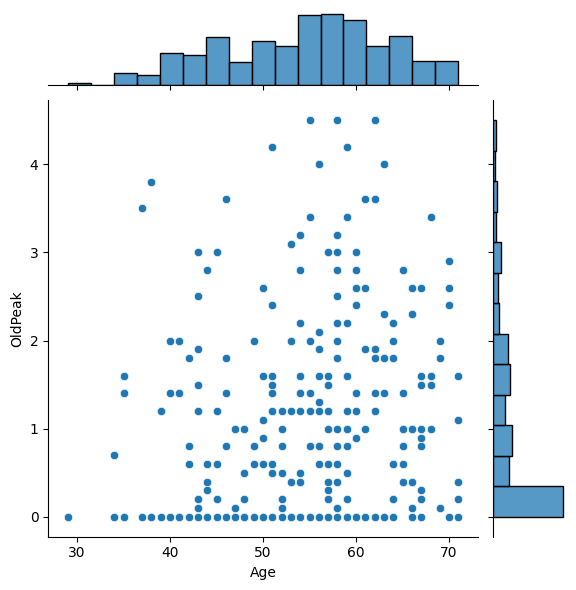

In [56]:
sns.jointplot(x="Age", y="OldPeak", data=df)    

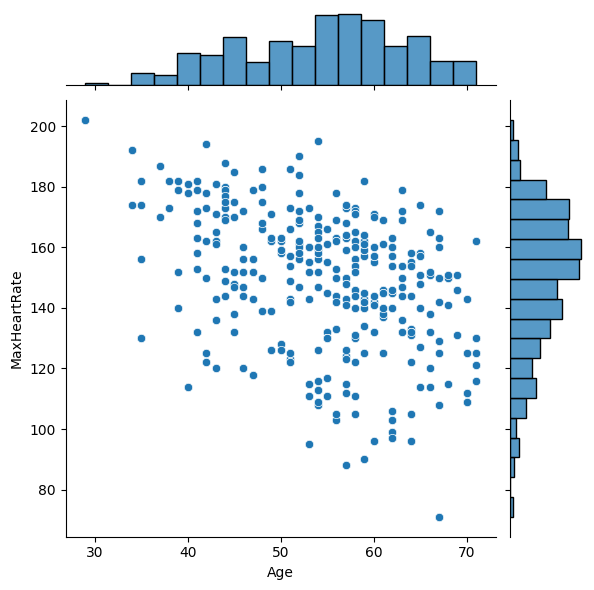

In [57]:
sns.jointplot(x="Age", y="MaxHeartRate", data=df)  

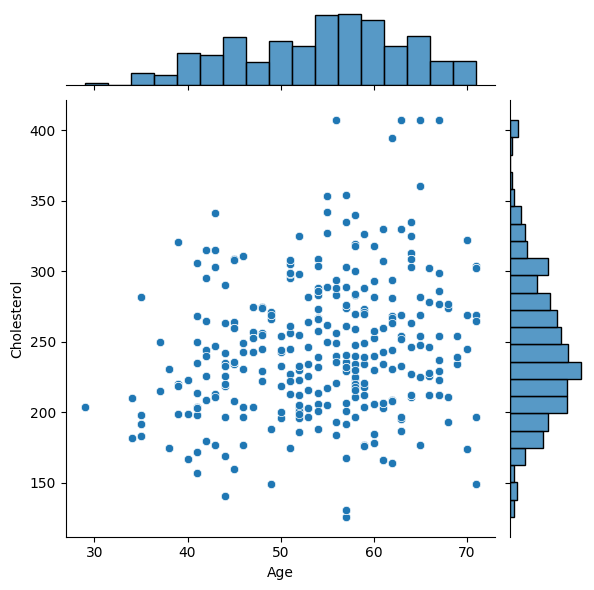

In [58]:
sns.jointplot(x="Age", y="Cholesterol", data=df)  

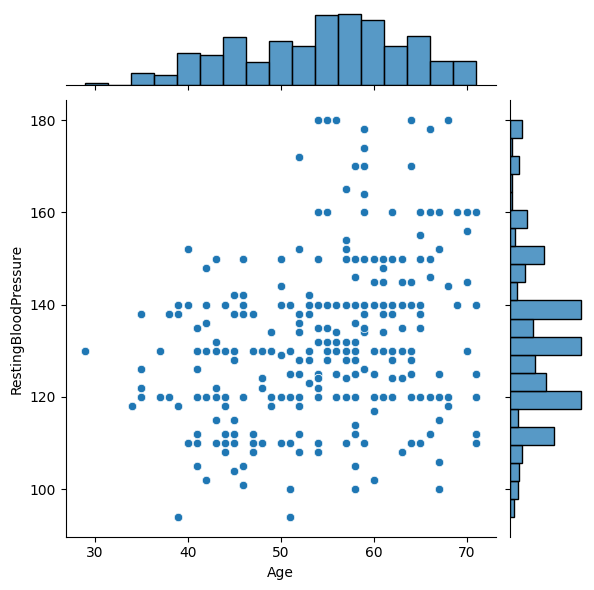

In [59]:
sns.jointplot(x="Age", y="RestingBloodPressure", data=df)  

# Encoding Our Data
Our data contains categorical features, therefore we cant perform certain operations such as correlation and skewdness. To correct this we encode our data. We will do this using One-Hot Encoding & Ordinal Encoding, while comparing results.

#### One-Hot Encoding

In [60]:
# encoded_df = pd.get_dummies(df)
# encoded_df.head()

In [61]:
# df.shape, encoded_df.shape

#### Ordinal Encoding

In [62]:
#Manually specify the order mapping
order_mapping = [["Female", "Male"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Sex']])
df['Sex_Encoded'] = encoded_data

In [63]:
#Manually specify the order mapping
order_mapping = [["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['ChestPain']])
df['ChestPain_Encoded'] = encoded_data

In [64]:
#Manually specify the order mapping
order_mapping = [[False,True]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['FastingBloodSugar']])
df['FastingBloodSugar_Encoded'] = encoded_data

In [65]:
#Manually specify the order mapping
order_mapping = [["Normal", "Abnormality", "Hypertrophy"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['RestingECG']])
df['RestingECG_Encoded'] = encoded_data

In [66]:
#Manually specify the order mapping
order_mapping = [["No", "Yes"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['ExcerciseAngina']])
df['ExcerciseAngina_Encoded'] = encoded_data

In [67]:
#Manually specify the order mapping
order_mapping = [["Normal", "Fixed defect", "Reversible defect", "Not described"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Thalium']])
df['Thalium_Encoded'] = encoded_data

In [68]:
#Manually specify the order mapping
order_mapping = [["No Disease", "Heart Disease"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Status']])
df['Status_Encoded'] = encoded_data

In [69]:
#Manually specify the order mapping
order_mapping = [["Downsloping", "Upsloping", "Flat"]]
#Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['STSlope']])
df['STSlope_Encoded'] = encoded_data

In [70]:
df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,...,Thalium,Status,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
0,52,Male,Typical angina,125,212,False,Abnormality,168,No,1.0,...,Not described,No Disease,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
1,53,Male,Typical angina,140,203,True,Normal,155,Yes,3.1,...,Not described,No Disease,1.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0
2,70,Male,Typical angina,145,174,False,Abnormality,125,Yes,2.6,...,Not described,No Disease,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0
3,61,Male,Typical angina,148,203,False,Abnormality,161,No,0.0,...,Not described,No Disease,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
4,62,Female,Typical angina,138,294,True,Abnormality,106,No,1.9,...,Reversible defect,No Disease,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0


### Deleting Columns That Contain Categorical Features

In [71]:
del df['Sex']
del df['ChestPain']
del df['FastingBloodSugar']
del df['RestingECG']
del df['ExcerciseAngina']
del df['Thalium']
del df['STSlope']
del df['Status']

### Visualising Our Data Post-Encoding

In [72]:
df.head(10)

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
0,52,125,212,168,1.0,2,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
1,53,140,203,155,3.1,0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0
2,70,145,174,125,2.6,0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0
3,61,148,203,161,0.0,1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
4,62,138,294,106,1.9,3,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0
5,58,100,248,122,1.0,0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
6,58,114,318,140,4.5,3,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
7,55,160,289,145,0.8,1,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
8,46,120,249,144,0.8,0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
9,54,122,286,116,3.2,2,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0


In [73]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.393171,131.498537,245.505366,149.114146,1.062634,0.754146,0.695610,0.942439,0.149268,0.529756,0.336585,2.323902,0.513171,1.012683
std,8.985587,17.142790,49.290931,23.005724,1.143024,1.030798,0.460373,1.029641,0.356527,0.527878,0.472772,0.620660,0.500070,0.963613
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,140.000000,275.000000,166.000000,1.800000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000
max,71.000000,180.000000,407.000000,202.000000,4.500000,4.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000


# Visualising Correlation Of Data
Using Heatmap

In [74]:
df2 = df.copy() 

<Axes: >

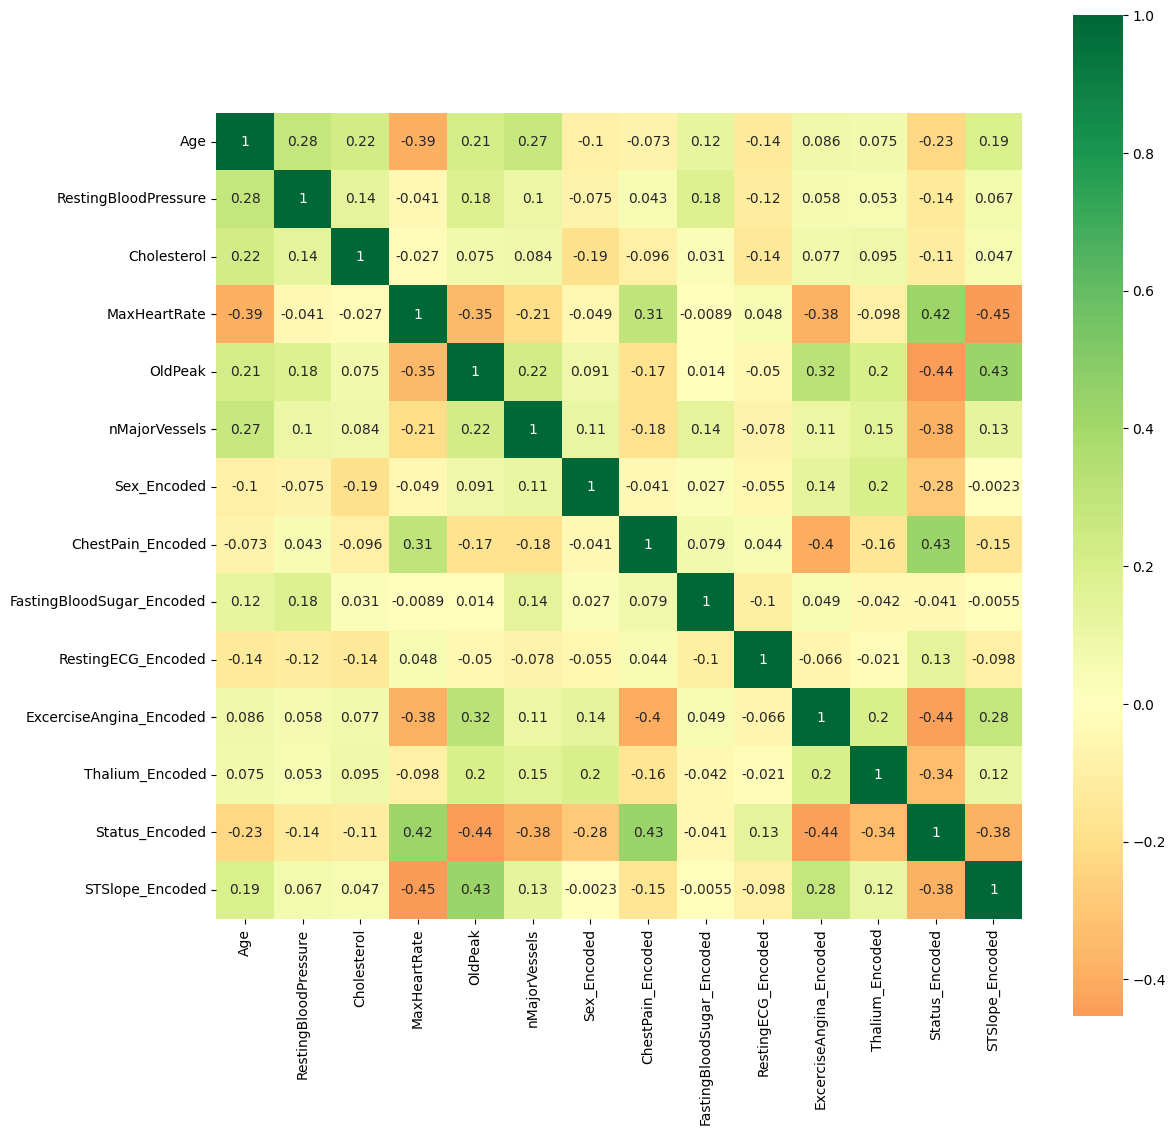

In [75]:
plt.figure(figsize = (13, 13))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

# Visualising Skewdness Of Data
Using Dist Plot

In [76]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3975909673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Age,  hist=True, kde=True)


<Axes: ylabel='Density'>

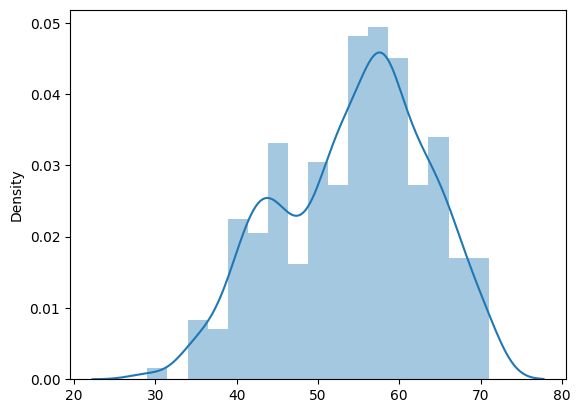

In [77]:
sns.distplot(x =df.Age,  hist=True, kde=True)

In [78]:
skewness_dist(df, "Age")

Skewness of the Age variable: -0.305
The distribution is left-skewed.


C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3372177591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.RestingBloodPressure,  hist=True, kde=True)


<Axes: ylabel='Density'>

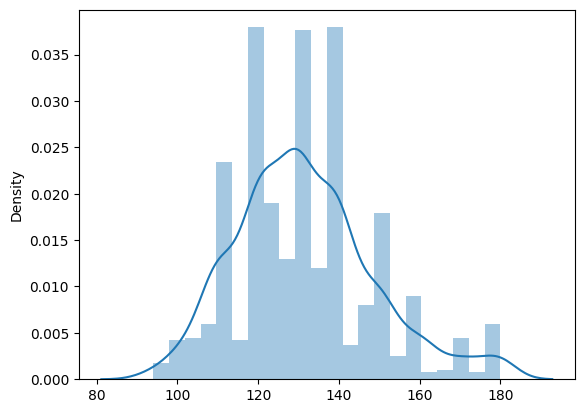

In [79]:
sns.distplot(x =df.RestingBloodPressure,  hist=True, kde=True)

In [80]:
skewness_dist(df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.586
The distribution is right-skewed.


C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\2507622617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Cholesterol,  hist=True, kde=True)


<Axes: ylabel='Density'>

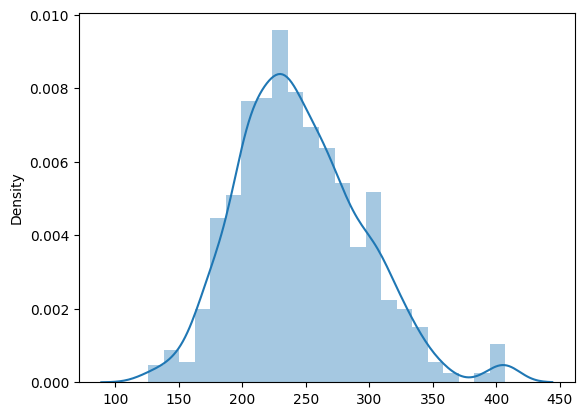

In [81]:
sns.distplot(x =df.Cholesterol,  hist=True, kde=True)

In [82]:
skewness_dist(df, "Cholesterol")

Skewness of the Cholesterol variable: 0.552
The distribution is right-skewed.


C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\1083735334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.OldPeak,  hist=True, kde=True)


<Axes: ylabel='Density'>

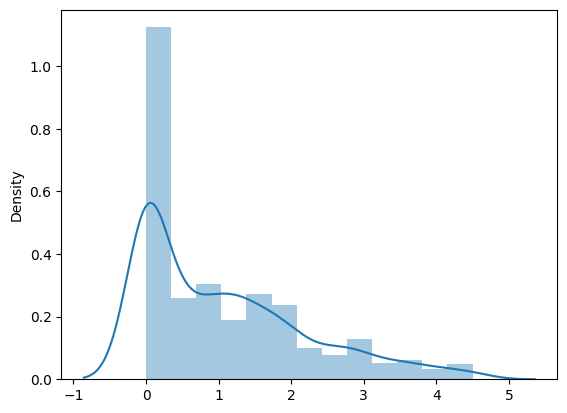

In [83]:
sns.distplot(x =df.OldPeak,  hist=True, kde=True)

In [84]:
skewness_dist(df, "OldPeak")

Skewness of the OldPeak variable: 1.024
The distribution is right-skewed.


C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3370105303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.MaxHeartRate,  hist=True, kde=True)


<Axes: ylabel='Density'>

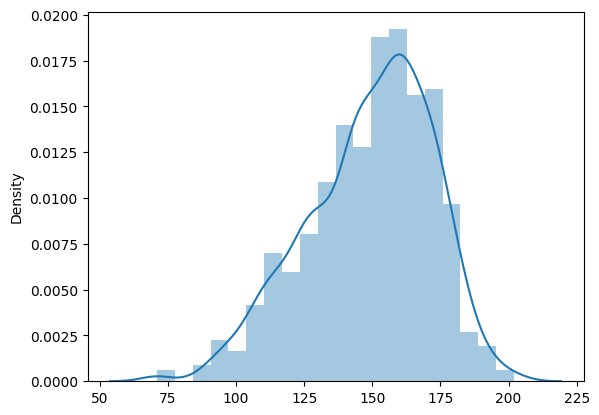

In [85]:
sns.distplot(x =df.MaxHeartRate,  hist=True, kde=True)

In [86]:
skewness_dist(df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.514
The distribution is left-skewed.


## Correcting Skewed Data
Using Box-Cox Method & Square Root

In [87]:
pd.Series(boxcox(df['MaxHeartRate']))

0    [31304.532730774572, 26281.503543651295, 16473...
1                                             2.171556
dtype: object

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3370105303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.MaxHeartRate,  hist=True, kde=True)


<Axes: ylabel='Density'>

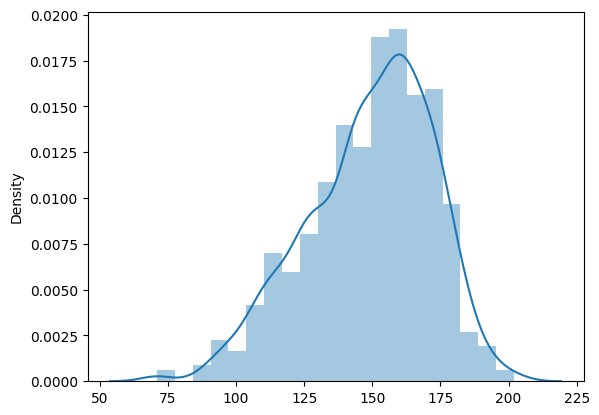

In [88]:
sns.distplot(x =df.MaxHeartRate,  hist=True, kde=True)

In [89]:
skewness_dist(df, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.514
The distribution is left-skewed.


In [90]:
np.sqrt(df.OldPeak)

0       1.000000
1       1.760682
2       1.612452
3       0.000000
4       1.378405
          ...   
1020    0.000000
1021    1.673320
1022    1.000000
1023    0.000000
1024    1.183216
Name: OldPeak, Length: 1025, dtype: float64

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\1083735334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.OldPeak,  hist=True, kde=True)


<Axes: ylabel='Density'>

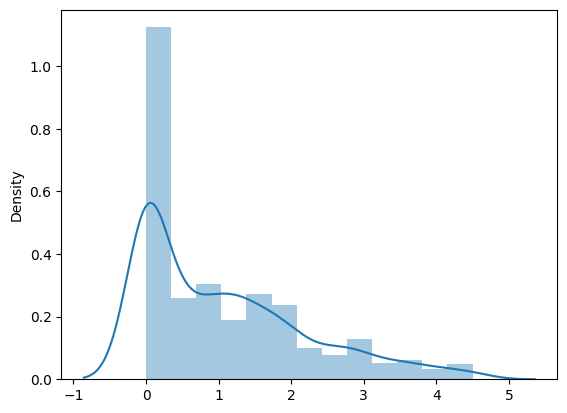

In [91]:
sns.distplot(x =df.OldPeak,  hist=True, kde=True)

In [92]:
skewness_dist(df, "OldPeak")

Skewness of the OldPeak variable: 1.024
The distribution is right-skewed.


In [93]:
np.sqrt(df.Cholesterol)

0       14.560220
1       14.247807
2       13.190906
3       14.247807
4       17.146428
          ...    
1020    14.866069
1021    16.062378
1022    16.583124
1023    15.937377
1024    13.711309
Name: Cholesterol, Length: 1025, dtype: float64

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\2507622617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Cholesterol,  hist=True, kde=True)


<Axes: ylabel='Density'>

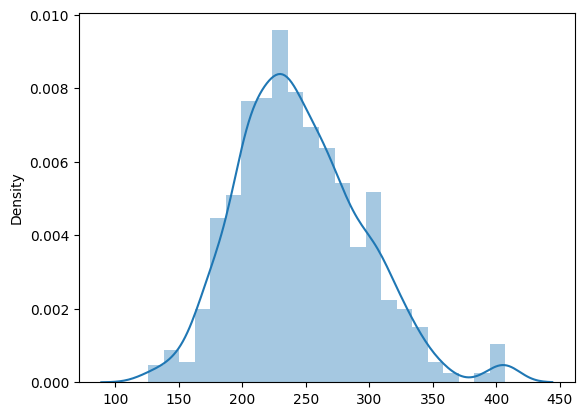

In [94]:
sns.distplot(x =df.Cholesterol,  hist=True, kde=True)

In [95]:
skewness_dist(df, "Cholesterol")

Skewness of the Cholesterol variable: 0.552
The distribution is right-skewed.


In [96]:
np.sqrt(df.RestingBloodPressure)

0       11.180340
1       11.832160
2       12.041595
3       12.165525
4       11.747340
          ...    
1020    11.832160
1021    11.180340
1022    10.488088
1023    10.488088
1024    10.954451
Name: RestingBloodPressure, Length: 1025, dtype: float64

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3372177591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.RestingBloodPressure,  hist=True, kde=True)


<Axes: ylabel='Density'>

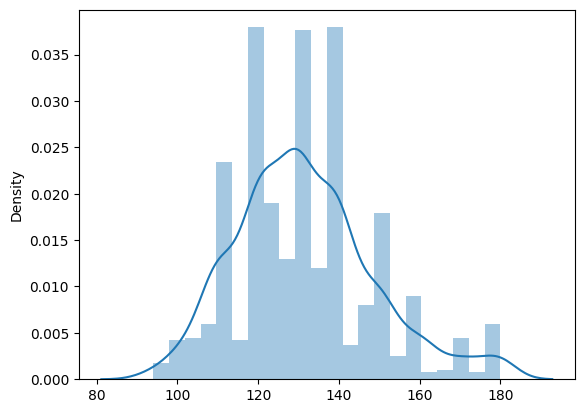

In [97]:
sns.distplot(x =df.RestingBloodPressure,  hist=True, kde=True)

In [98]:
skewness_dist(df, "RestingBloodPressure")

Skewness of the RestingBloodPressure variable: 0.586
The distribution is right-skewed.


In [99]:
pd.Series(boxcox(df['Age']))

0    [474.60927293600855, 490.1857504820533, 785.48...
1                                             1.693233
dtype: object

C:\Users\Abdulwahab Uthman\AppData\Local\Temp\ipykernel_16468\3975909673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Age,  hist=True, kde=True)


<Axes: ylabel='Density'>

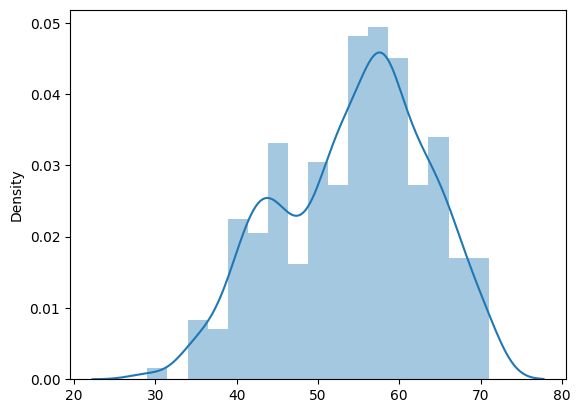

In [100]:
sns.distplot(x =df.Age,  hist=True, kde=True)

In [101]:
skewness_dist(df, "Age")

Skewness of the Age variable: -0.305
The distribution is left-skewed.


# Data Evaluation
### Analysing Our Data
- We were able to analyse our data and understand the series and their data values.
- We replaced some numerical values in our data with categorical ones.
- We visualised data in our to help identify outliers and understand data trends.
- We noted outliers in our data and the type of corrections needed on them.
### Cleaning Our Data
- The following columns had outlier values:
    - OldPeak (Upper Bound)
    - Cholesterol (Upper Bound)
    - RestingBloodPressure (Upper Bound)
    - Age (Upper Bound)
- We corrected these outliers using capping and flooring method.
- We visualised our data after dealing with outliers showing the corrections made.
### Data Encoding
- We encoded our categorical values using Ordinal Encoding.
- We created new columns containing our encoded data.
- We dropped the previous columns that contained the non-encoded data.
### Data Correlation
- We tested for data correlation.
- We used a heatmap to visualise data correlation.
- There was a low level of correlation in our data.
### Data Skew
- We checked for the skew in our data using skewness_dist function which we created.
- We visualised the skew in our data using distplt.
- We corrected skew in our data by using:
    - Box-Cox Method for right skewed data.
    - Square Root Method for left skewed data.

*We were able to analyse our data, clean our data, encode our data, check for correlation and check for data skew.*

# Visualisng Our Data Post Cleaning

In [102]:
df.head(10)

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
0,52,125,212,168,1.0,2,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
1,53,140,203,155,3.1,0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,1.0
2,70,145,174,125,2.6,0,1.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0
3,61,148,203,161,0.0,1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
4,62,138,294,106,1.9,3,0.0,0.0,1.0,1.0,0.0,2.0,0.0,2.0
5,58,100,248,122,1.0,0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
6,58,114,318,140,4.5,3,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
7,55,160,289,145,0.8,1,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
8,46,120,249,144,0.8,0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
9,54,122,286,116,3.2,2,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0


In [103]:
df.tail(10)

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
1015,58,128,216,131,2.2,3,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
1016,65,138,282,174,1.4,1,1.0,3.0,1.0,0.0,0.0,2.0,0.0,2.0
1017,53,123,282,95,2.0,2,1.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0
1018,41,110,172,158,0.0,0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
1019,47,112,204,143,0.1,0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
1020,59,140,221,164,0.0,0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
1021,60,125,258,141,2.8,1,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
1022,47,110,275,118,1.0,1,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0
1023,50,110,254,159,0.0,0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1024,54,120,188,113,1.4,1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,2.0


In [104]:
df.describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,OldPeak,nMajorVessels,Sex_Encoded,ChestPain_Encoded,FastingBloodSugar_Encoded,RestingECG_Encoded,ExcerciseAngina_Encoded,Thalium_Encoded,Status_Encoded,STSlope_Encoded
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.393171,131.498537,245.505366,149.114146,1.062634,0.754146,0.695610,0.942439,0.149268,0.529756,0.336585,2.323902,0.513171,1.012683
std,8.985587,17.142790,49.290931,23.005724,1.143024,1.030798,0.460373,1.029641,0.356527,0.527878,0.472772,0.620660,0.500070,0.963613
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,140.000000,275.000000,166.000000,1.800000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000
max,71.000000,180.000000,407.000000,202.000000,4.500000,4.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1025 non-null   int64  
 1   RestingBloodPressure       1025 non-null   int64  
 2   Cholesterol                1025 non-null   int64  
 3   MaxHeartRate               1025 non-null   int64  
 4   OldPeak                    1025 non-null   float64
 5   nMajorVessels              1025 non-null   int64  
 6   Sex_Encoded                1025 non-null   float64
 7   ChestPain_Encoded          1025 non-null   float64
 8   FastingBloodSugar_Encoded  1025 non-null   float64
 9   RestingECG_Encoded         1025 non-null   float64
 10  ExcerciseAngina_Encoded    1025 non-null   float64
 11  Thalium_Encoded            1025 non-null   float64
 12  Status_Encoded             1025 non-null   float64
 13  STSlope_Encoded            1025 non-null   float

In [106]:
df.shape

(1025, 14)

In [107]:
df.isnull().sum()

Age                          0
RestingBloodPressure         0
Cholesterol                  0
MaxHeartRate                 0
OldPeak                      0
nMajorVessels                0
Sex_Encoded                  0
ChestPain_Encoded            0
FastingBloodSugar_Encoded    0
RestingECG_Encoded           0
ExcerciseAngina_Encoded      0
Thalium_Encoded              0
Status_Encoded               0
STSlope_Encoded              0
dtype: int64

# Modeling

*Defining Our a function to split our dataset into train & test.*

In [108]:
def customize_split(df):
# Shuffle the dataframe to randomize the order of samples
    df_shuffled = df.sample(frac=1, random_state=42)

# Define the proportions for train and test sets
    train_size = 0.7
    test_size = 0.3

# Calculate the number of samples for each set
    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

# Create the training set by selecting the first 'num_samples_train' samples
    train_df = df_shuffled.head(num_samples_train)

# Calculate the number of samples per class for the test set
    num_samples_per_class_test = int(num_samples_test / 2)

# Create the test set by selecting equal number of samples from each class
    test_df = pd.concat([
        df_shuffled[df_shuffled['Status_Encoded'] == 0].tail(num_samples_per_class_test),
        df_shuffled[df_shuffled['Status_Encoded'] == 1].tail(num_samples_per_class_test)
    ])

# Separate features and labels for the training set
    X_train = train_df.drop(columns=['Status_Encoded'])
    y_train = train_df['Status_Encoded'].values 

# Separate features and labels for the test set
    X_test = test_df.drop(columns=['Status_Encoded'])
    y_test = test_df['Status_Encoded'].values

# Print the class distribution in the test set
    print(test_df['Status_Encoded'].value_counts())

# Calculate the percentage of samples in the training and test sets
    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100
    
# Return the training and test data along with their percentages    
    return X_train, X_test, y_train, y_test, percent_train, percent_test

In [109]:
df_X_train, df_X_test, df_y_train, df_y_test, ptrain_df, ptest_df = customize_split(df)
#transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df, ptest_df = customize_split(transformed)

Status_Encoded
0.0    154
1.0    154
Name: count, dtype: int64


In [110]:
print(f"Percentage of samples for training: {ptrain_df:.2f}%")
print(f"Percentage of samples for testing: {ptest_df:.2f}%")

Percentage of samples for training: 69.95%
Percentage of samples for testing: 30.05%


In [111]:
print(len(df_X_train), len(df_X_test), len(df_y_train), len(df_y_test))

717 308 717 308


In [112]:
(pd.DataFrame(df_y_train)).value_counts()

0  
1.0    366
0.0    351
Name: count, dtype: int64

# KNN Model Evaluation 

## K-Nearest Neighbors (KNN) Model:
*K-Nearest Neighbors is a simple supervised machine learning algorithm used for classification and regression tasks. In KNN, the prediction for a new data point is based on the majority class (for classification) or the average (for regression) of its k nearest neighbors in the feature space.*

Non-parametric: KNN is a non-parametric method, meaning it does not make any assumptions about the underlying data distribution. Instead, it relies on the data itself to make predictions.

Distance Metric: KNN uses a distance metric to measure the similarity between data points. The choice of distance metric can impact the performance of the algorithm.

Hyperparameter k: The number of nearest neighbors (k) is a hyperparameter that needs to be specified. Choosing the appropriate value of k is crucial and can affect the model's performance.

### Implementation in Code:
- Importing the Necessary Libraries: The required libraries from scikit-learn (KNeighborsClassifier) have been imported.

- Training the Model: The KNN model has been trained using the training data (df_X_train, df_y_train) by initializing a KNeighborsClassifier object with specified parameters (e.g., number of neighbors) and then fitting it to the training data.

- Evaluating the Model: The trained model has been evaluated using the testing data (df_X_test, df_y_test). Predictions are made on the testing set, and performance metrics such as accuracy, confusion matrix, and classification report are calculated and displayed.

In [113]:
# Train the KNN Model
# Initialize KNN classifier with chosen K value
knn = knn(n_neighbors=5)  # Example: K=5

In [114]:
# Fit the model to the training data
knn.fit(df_X_train, df_y_train)

KNeighborsClassifier()

In [115]:
# Evaluate the Model
# Predict on the testing set
y_pred = knn.predict(df_X_test)

In [116]:
# Calculate accuracy
accuracy = accuracy_score(df_y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.711038961038961


In [117]:
# Generate confusion matrix
cm = confusion_matrix(df_y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[111  43]
 [ 46 108]]


In [118]:
# Generate classification report
print("Classification Report:")
print(classification_report(df_y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71       154
         1.0       0.72      0.70      0.71       154

    accuracy                           0.71       308
   macro avg       0.71      0.71      0.71       308
weighted avg       0.71      0.71      0.71       308



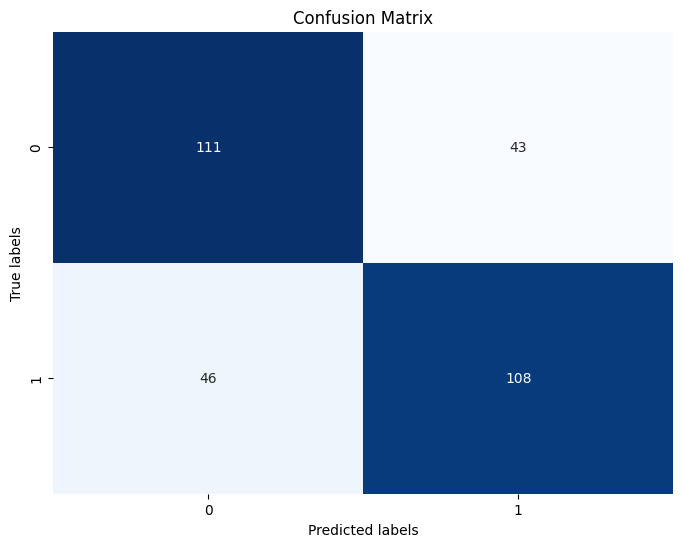

In [119]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# RF Model Evaluation

## RF(Random Forest) Model
*Random Forest is an ensemble learning method used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees.*

Ensemble Method: Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through averaging (for regression) or voting (for classification).

Decision Trees: Each decision tree in the Random Forest is built using a random subset of features and a random subset of the training data. This randomness helps to reduce overfitting and improve generalization.

Bagging: Random Forest employs a technique called bagging (bootstrap aggregating), where each tree is trained on a bootstrapped sample of the training data. This further helps in reducing variance and improving stability.

Feature Importance: Random Forest can provide information about the relative importance of features in making predictions, which can be useful for feature selection and understanding the dataset.

### Implementation in Code:
The Random Forest model has been implemented in the provided code as follows:
- Importing the Necessary Libraries: The required libraries from scikit-learn (RandomForestClassifier) have been imported.

- Training the Model: The Random Forest model has been trained using the training data (df_X_train, df_y_train) by initializing a RandomForestClassifier object with specified parameters (e.g., number of trees) and then fitting it to the training data.

- Evaluating the Model: The trained model has been evaluated using the testing data (df_X_test, df_y_test). Predictions are made on the testing set, and performance metrics such as accuracy, confusion matrix, and classification report are calculated and displayed.

In [120]:
# Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  

In [121]:
# Fit the model to the training data
rf.fit(df_X_train, df_y_train)

RandomForestClassifier(random_state=42)

In [122]:
# Evaluate the Model
y_pred_rf = rf.predict(df_X_test)

In [123]:
# Calculate accuracy
accuracy_rf = accuracy_score(df_y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9902597402597403


In [124]:
# Generate confusion matrix
cm_rf = confusion_matrix(df_y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

Random Forest Confusion Matrix:
[[154   0]
 [  3 151]]


In [125]:
# Generate classification report
print("Random Forest Classification Report:")
print(classification_report(df_y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       154
         1.0       1.00      0.98      0.99       154

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



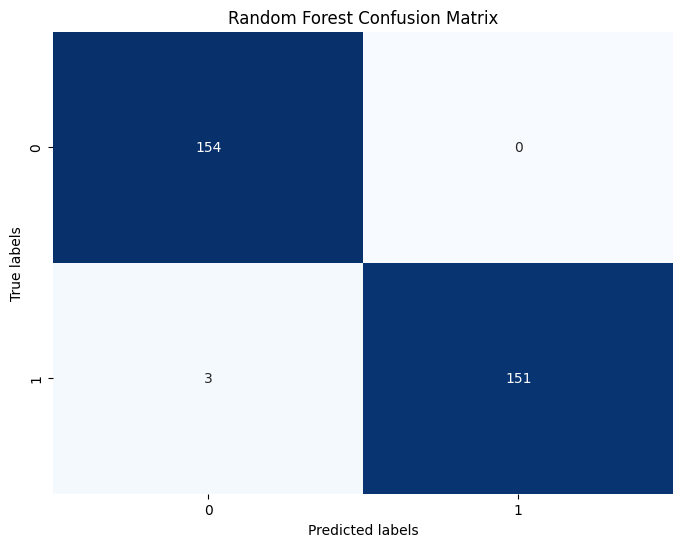

In [126]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM Model Evaluation

## Support Vector Machine (SVM) Model:
*Support Vector Machine is a supervised machine learning algorithm used for classification and regression tasks. SVMs are based on the concept of finding the hyperplane that best separates different classes in the feature space.*

Hyperplane: In SVM, the goal is to find the hyperplane that maximizes the margin between classes. For binary classification, this hyperplane separates the feature space into two classes, with the maximum margin between the closest data points (support vectors) of different classes.

Implementation in Code:
- Importing the Necessary Libraries: The required libraries from scikit-learn (SVC) have been imported.

- Training the Model: The SVM model has been trained using the training data (df_X_train, df_y_train) by initializing an SVC object with specified parameters (e.g., kernel type) and then fitting it to the training data.

- Evaluating the Model: The trained model has been evaluated using the testing data (df_X_test, df_y_test). Predictions are made on the testing set, and performance metrics such as accuracy, confusion matrix, and classification report are calculated and displayed.

In [127]:
# Train the SVM Model
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  

In [128]:
# Fit the model to the training data
svm.fit(df_X_train, df_y_train)

SVC(random_state=42)

In [129]:
# Evaluate the Model
# Predict on the testing set
y_pred_svm = svm.predict(df_X_test)

In [130]:
# Calculate accuracy
accuracy_svm = accuracy_score(df_y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.6948051948051948


In [131]:
# Generate confusion matrix
cm_svm = confusion_matrix(df_y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)

SVM Confusion Matrix:
[[ 98  56]
 [ 38 116]]


In [132]:
# Generate classification report
print("SVM Classification Report:")
print(classification_report(df_y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       154
         1.0       0.67      0.75      0.71       154

    accuracy                           0.69       308
   macro avg       0.70      0.69      0.69       308
weighted avg       0.70      0.69      0.69       308



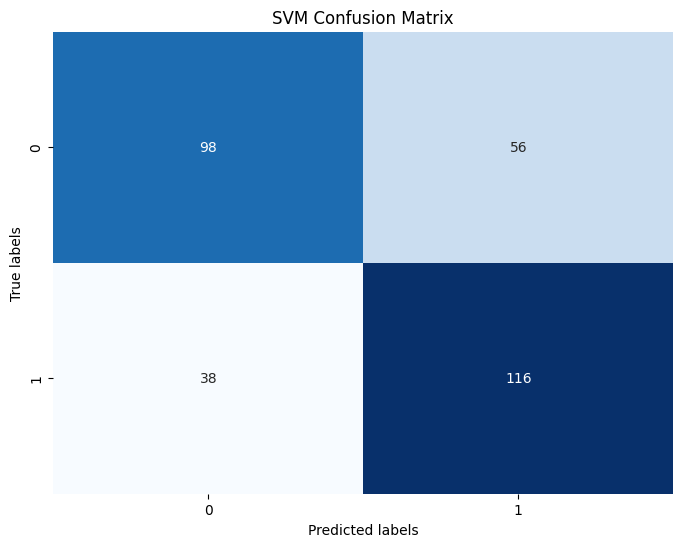

In [133]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("SVM Confusion Matrix")
plt.show()

# DTs Model Evaluation

## Decision Trees (DTs) Model:
*Decision Trees are a popular supervised machine learning algorithm used for classification and regression tasks. In a decision tree, each internal node represents a feature (or attribute), each branch represents a decision based on that feature, and each leaf node represents the outcome (class label or value).*
Hierarchical Structure: Decision Trees have a hierarchical structure, where decisions are made based on the values of features at each node, leading to a series of binary splits until reaching leaf nodes.

Feature Importance: Decision Trees can provide insights into feature importance, indicating which features are most influential in making decisions. This information can be valuable for feature selection and understanding the dataset.

Prone to Overfitting: Decision Trees are prone to overfitting, especially when the tree depth is not constrained. Regularization techniques such as pruning or limiting the tree depth can help mitigate overfitting.

### Implementation in Code:
- Importing the Necessary Libraries: The required libraries from scikit-learn (DecisionTreeClassifier) have been imported.

- Training the Model: The Decision Trees model has been trained using the training data (df_X_train, df_y_train) by initializing a DecisionTreeClassifier object with specified parameters (e.g., tree depth) and then fitting it to the training data.

- Evaluating the Model: The trained model has been evaluated using the testing data (df_X_test, df_y_test). Predictions are made on the testing set, and performance metrics such as accuracy, confusion matrix, and classification report are calculated and displayed.

In [134]:
# Train the Decision Trees Model
dt = DecisionTreeClassifier(random_state=42)  

In [135]:
# Fit the model to the training data
dt.fit(df_X_train, df_y_train)

DecisionTreeClassifier(random_state=42)

In [136]:
# Evaluate the Model
y_pred_dt = dt.predict(df_X_test)

In [137]:
# Calculate accuracy
accuracy_dt = accuracy_score(df_y_test, y_pred_dt)
print("Decision Trees Accuracy:", accuracy_dt)

Decision Trees Accuracy: 0.9902597402597403


In [138]:
# Generate confusion matrix
cm_dt = confusion_matrix(df_y_test, y_pred_dt)
print("Decision Trees Confusion Matrix:")
print(cm_dt)

Decision Trees Confusion Matrix:
[[154   0]
 [  3 151]]


In [139]:
# Generate classification report
print("Decision Trees Classification Report:")
print(classification_report(df_y_test, y_pred_dt))

Decision Trees Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       154
         1.0       1.00      0.98      0.99       154

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



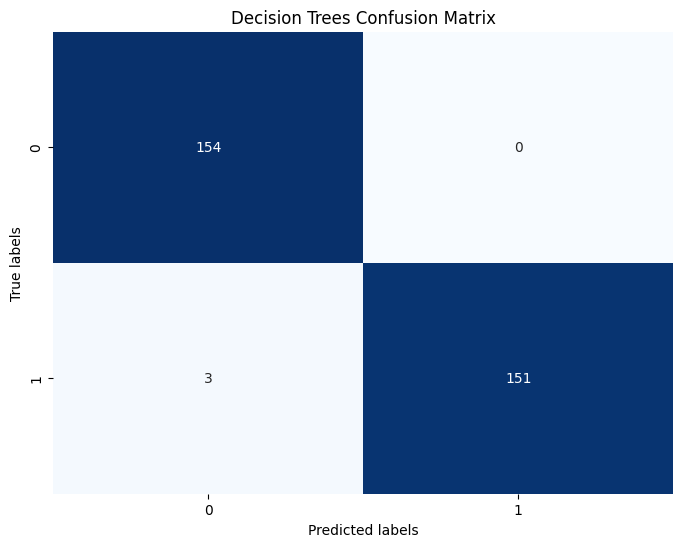

In [140]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Decision Trees Confusion Matrix")
plt.show()

# Visualing The Accuracy Of Our Models

### Accuracy For RF Model

In [141]:
# Calculate accuracy for training set
y_pred_train_rf = rf.predict(df_X_train)
accuracy_train_rf = accuracy_score(df_y_train, y_pred_train_rf)

# Calculate accuracy for testing set
accuracy_test_rf = accuracy_score(df_y_test, y_pred_rf)

print("Accuracy for training set:", accuracy_train_rf)
print("Accuracy for testing set:", accuracy_test_rf)

Accuracy for training set: 1.0
Accuracy for testing set: 0.9902597402597403


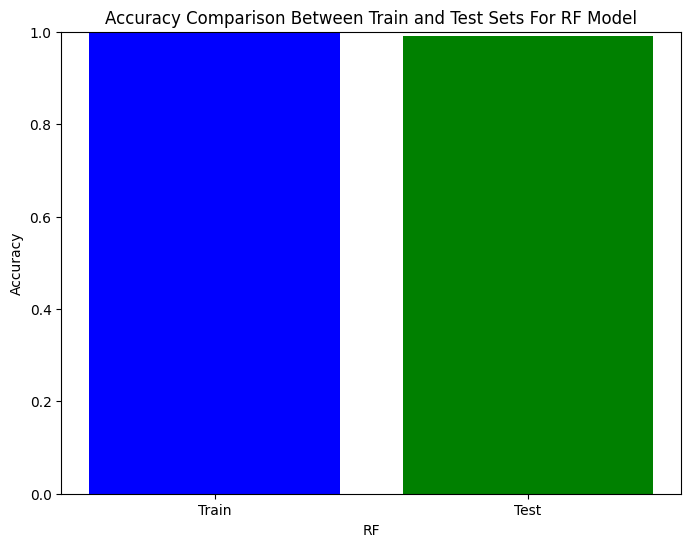

In [142]:
# Accuracy values for train and test
accuracy_train = accuracy_train_rf
accuracy_test = accuracy_test_rf

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.xlabel('RF')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Train and Test Sets For RF Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 (assuming accuracy is between 0 and 1)
plt.show()

### Accuracy For KNN Model

In [143]:
# Calculate accuracy for training set
y_pred_train_knn = knn.predict(df_X_train)
accuracy_train_knn = accuracy_score(df_y_train, y_pred_train_knn)

# Calculate accuracy for testing set
accuracy_test_knn = accuracy_score(df_y_test, y_pred)

print("Accuracy for training set:", accuracy_train_knn)
print("Accuracy for testing set:", accuracy_test_knn)

Accuracy for training set: 0.8730822873082287
Accuracy for testing set: 0.711038961038961


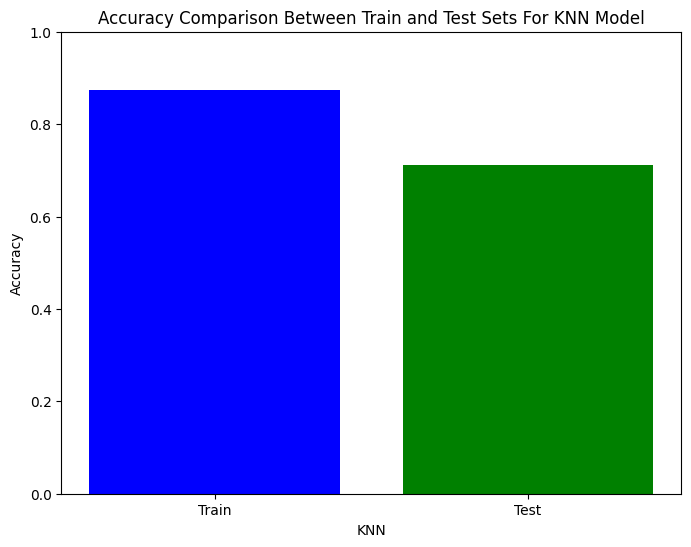

In [144]:
# Accuracy values for train and test
accuracy_train = accuracy_train_knn
accuracy_test = accuracy_test_knn

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.xlabel('KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Train and Test Sets For KNN Model')
plt.ylim(0, 1)  
plt.show()

### Accuracy For SVM Model

In [145]:
# Calculate accuracy for training set
y_pred_train_svm = svm.predict(df_X_train)
accuracy_train_svm = accuracy_score(df_y_train, y_pred_train_svm)

# Calculate accuracy for testing set
accuracy_test_svm = accuracy_score(df_y_test, y_pred_svm)

print("Accuracy for training set:", accuracy_train_svm)
print("Accuracy for testing set:", accuracy_test_svm)

Accuracy for training set: 0.7140864714086471
Accuracy for testing set: 0.6948051948051948


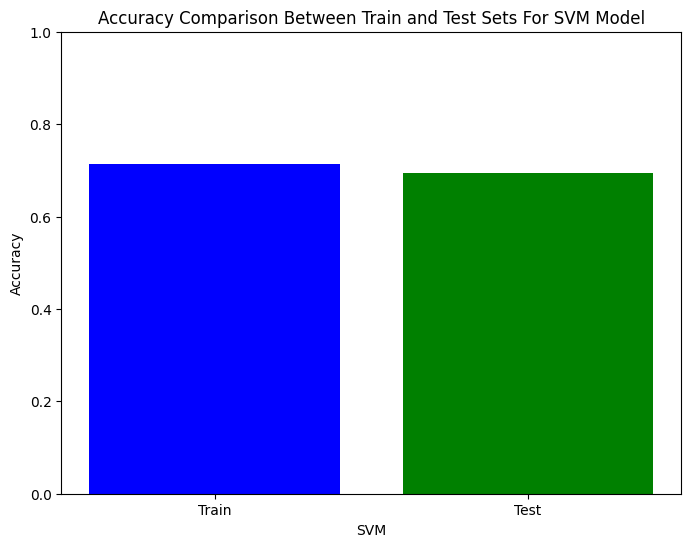

In [146]:
# Accuracy values for train and test
accuracy_train = accuracy_train_svm
accuracy_test = accuracy_test_svm

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.xlabel('SVM')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Train and Test Sets For SVM Model')
plt.ylim(0, 1)  
plt.show()

### Accuracy For DTs Model

In [147]:
# Calculate accuracy for training set
y_pred_train_dt = dt.predict(df_X_train)
accuracy_train_dt = accuracy_score(df_y_train, y_pred_train_dt)

# Calculate accuracy for testing set
accuracy_test_dt = accuracy_score(df_y_test, y_pred_dt)

print("Accuracy for training set:", accuracy_train_dt)
print("Accuracy for testing set:", accuracy_test_dt)

Accuracy for training set: 1.0
Accuracy for testing set: 0.9902597402597403


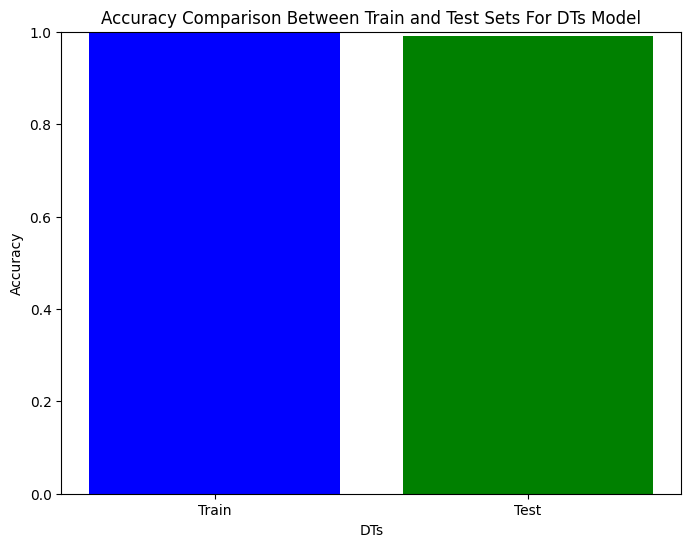

In [148]:
# Accuracy values for train and test
accuracy_train = accuracy_train_dt
accuracy_test = accuracy_test_dt

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [accuracy_train, accuracy_test], color=['blue', 'green'])
plt.xlabel('DTs')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Train and Test Sets For DTs Model')
plt.ylim(0, 1)  
plt.show()

# Conclusion
#### Dealing With Outliers:
- Four Series In Our Dataset Contained Outliers Out Of 14 Series. We Handled These Outliers By Using Capping & Flooring Method.
#### Challenges Faced:
- High Level Of Accuracy For a Few Models Used(KNN, DTs). Which Could Represent Overfitting.
- Not Enough Data. Our Dataset Had 1025 Columns, Which When Split Between Training(70%) and Testing(30%). Meant For Training 717 For For Testing 308. Which isn't Enough.
- Imbalanced number of samples for classes on test data: Getting good results for both types of data (class 0 and class 1) was tough for SVM model.
#### Models Used:
- KNN
- SVM
- RF
- DTs
#### Model Performance:
- KNN [ Test:87 Training:71 ]
- SVM [ Test:71 Training:69 ]
- RF [ Test:100 Training:99 ]
- DTs [ Test:100 , Training:99 ]

RF and DTs Models had the highest accuracy of all the models used. Both having an accuracy of 99% for the training data.